In [1337]:
from bs4 import BeautifulSoup
import requests
import time, os
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [250]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chromedriver = "/Applications/chromedriver"
os.environ["webdriver.chrome.driver"] = chromedriver
driver = webdriver.Chrome(chromedriver)


In [1686]:
names = []
prices = []
categories = []
reviews = []
ratings = []

In [1338]:
# backup file with saved scraped html
with open("/Users/emmaalexander/Desktop/html_source_file.html") as fp:
    soup = BeautifulSoup(fp, 'html.parser')

In [251]:
# scraping pages one at a time, since any automatic Javascript triggered bot warning
wine_search = "https://www.totalwine.com/wine/red-wine/c/000009?&page=15&Size=120&volume=Standard%20750%20ml&aty=0,0,0,0"
driver.get(wine_search)

In [160]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [1687]:
# scraping region, ratings, reviews, grapes, price, name
for name in soup.find_all('h2', class_='title__2RoYeYuO'):
    names.append(name.text)
for price in soup.find_all('span', class_='price__1JvDDp_x'):
    prices.append(price.text)
for category in soup.find_all('div', class_='categoryLinksWrapper__3-AYMzEn'):
    categories.append(category.text)
for review in soup.find_all('a', class_='ratingsHolder__2EWw3Ey5'):
    reviews.append(review.text)
for rating in soup.find_all('article', class_='productCard__2nWxIKmi'):
    try:
        rating_var = rating.find('div', class_='ratingBanner__2B8hmgMn').findNext().text
        ratings.append(rating_var)
    except:
        ratings.append('')

In [1344]:
print(len(names))
print(len(prices))
print(len(categories))
print(len(ratings))
print(len(reviews))

3613
3625
3613
3613
3613


In [1688]:
import re
reviews2 = []
for review in reviews:
    new = re.sub(' out.*','',review)
    reviews2.append(new)
reviews2[0:6]

['Be the first to review', '4.5', '3.8', '4.2', '4.1', '4.2']

In [1689]:
clean_names = []
for name in names:
    no_ml = name.replace('750ml','')
    clean_names.append(no_ml)
print(clean_names[0:20])

['District Series Cabernet Sauvignon Napa', 'Floorshow Red', 'Carmen Gran Reserva Cabernet Sauvignon, 2018', 'Sextant Cabernet Sauvignon Paso Robles, 2018', 'Oak Ridge Cabernet Estate Grown Lodi', 'San Gregorio El Vergal Tempranillo, 2019', 'Ropiteau Pinot Noir', 'Chateau Pierre de Montignac Medoc, 2018', 'Cloud Break Pinot Noir', 'Asua Rioja Crianza, 2016', 'Le Pont Bandol', 'Domaine Brusset Cotes de Rhone Laurent B, 2019', 'Tensley Syrah Santa Barbara', 'Amici Cabernet Sauvignon Napa, 2018', 'Renieri Rosso di Montalcino, 2018', 'Mascota Vineyards Unanime, 2017', 'Silver Ghost Cabernet Sauvignon Napa Valley, 2018', 'Mascota Vineyards Unanime Malbec, 2017', "Leone D'Oro Vino Nobile di Montepulciano, 2015", 'Carmen Gran Reserva Carmenere, 2019']


In [1690]:
no_sales = []
for idx, price in enumerate(prices):
    if price.count('$') == 2:
        stripped_price = "$".join(price.split("$")[:2])
        prices.remove(prices[idx+1])
        no_sales.append(stripped_price)
    else:
        no_sales.append(price)
print(no_sales[0:20])

['$24.99', '$36.99', '$14.99', '$19.99', '$12.99', '$10.99', '$9.99', '$16.99', '$8.99', '$19.99', '$22.99', '$19.99', '$24.99', '$49.99', '$19.99', '$24.99', '$39.99', '$24.99', '$21.99', '$15.99']


In [1691]:
len(no_sales)

3613

In [1692]:
import re
nested_grape_region = []
rep = []
for feature in categories:
    no_red = feature.replace('La Rioja','Rioja')
    no_red = re.sub( r"(?!cLa)(?!cMi)([a-z])([A-Z])", r"\1,\2", no_red).split(',')
    nested_grape_region.append(no_red)
print(nested_grape_region[0:20])

[['Napa Valley', 'Red Wine', 'Cabernet Sauvignon'], ['Red Wine', 'Zinfandel'], ['Maipo Valley', 'Red Wine', 'Cabernet Sauvignon'], ['Central Coast', 'Red Wine', 'Cabernet Sauvignon', 'Paso Robles'], ['Lodi', 'Red Wine', 'Cabernet Sauvignon'], ['Calatayud', 'Red Wine', 'Tempranillo'], ['Red Wine', 'Pinot Noir'], ['Bordeaux', 'Red Wine', 'Bordeaux Blend', 'Medoc'], ['Red Wine', 'Pinot Noir'], ['Rioja', 'Red Wine', 'Tempranillo'], ['Provence', 'Red Wine', 'Rhone Blend', 'Bandol'], ['Rhone', 'Red Wine', 'Rhone Blend', 'Cotes du Rhone'], ['Santa Barbara', 'Red Wine', 'Syrah/Shiraz'], ['Napa Valley', 'Red Wine', 'Cabernet Sauvignon'], ['Tuscany', 'Red Wine', 'Sangiovese', 'Rosso di Montalcino'], ['Mendoza', 'Red Wine', 'Cabernet Sauvignon'], ['Napa Valley', 'Red Wine', 'Cabernet Sauvignon'], ['Mendoza', 'Red Wine', 'Malbec'], ['Tuscany', 'Red Wine', 'Sangiovese', 'Vino Nobile di Montepulciano'], ['Colchagua Valley', 'Red Wine', 'Carmenere']]


In [1693]:
len(nested_grape_region)

3613

In [1694]:
import pandas as pd
categories_df = pd.DataFrame({'category':nested_grape_region})
print(categories_df.head())
prices_df = pd.DataFrame({'price':no_sales})
print(prices_df.head())
names_df = pd.DataFrame({'name':clean_names})
print(names_df.head())
reviews_df = pd.DataFrame({'reviews':reviews2})
print(reviews_df.head())
ratings_df = pd.DataFrame({'rating':ratings})
print(ratings_df.head())

                                            category
0        [Napa Valley, Red Wine, Cabernet Sauvignon]
1                              [Red Wine, Zinfandel]
2       [Maipo Valley, Red Wine, Cabernet Sauvignon]
3  [Central Coast, Red Wine, Cabernet Sauvignon, ...
4               [Lodi, Red Wine, Cabernet Sauvignon]
    price
0  $24.99
1  $36.99
2  $14.99
3  $19.99
4  $12.99
                                           name
0       District Series Cabernet Sauvignon Napa
1                                 Floorshow Red
2  Carmen Gran Reserva Cabernet Sauvignon, 2018
3  Sextant Cabernet Sauvignon Paso Robles, 2018
4          Oak Ridge Cabernet Estate Grown Lodi
                  reviews
0  Be the first to review
1                     4.5
2                     3.8
3                     4.2
4                     4.1
  rating
0       
1       
2     92
3     92
4       


In [1696]:
# creating main dataframe with all features
wine_df = pd.concat([prices_df, names_df, categories_df, reviews_df, ratings_df], axis=1)
print(wine_df.head())

    price                                          name  \
0  $24.99       District Series Cabernet Sauvignon Napa   
1  $36.99                                 Floorshow Red   
2  $14.99  Carmen Gran Reserva Cabernet Sauvignon, 2018   
3  $19.99  Sextant Cabernet Sauvignon Paso Robles, 2018   
4  $12.99          Oak Ridge Cabernet Estate Grown Lodi   

                                            category                 reviews  \
0        [Napa Valley, Red Wine, Cabernet Sauvignon]  Be the first to review   
1                              [Red Wine, Zinfandel]                     4.5   
2       [Maipo Valley, Red Wine, Cabernet Sauvignon]                     3.8   
3  [Central Coast, Red Wine, Cabernet Sauvignon, ...                     4.2   
4               [Lodi, Red Wine, Cabernet Sauvignon]                     4.1   

  rating  
0         
1         
2     92  
3     92  
4         


In [1697]:
# extracing year from name column
wine_df['year'] = wine_df['name'].str.extract('(2\d\d\d)',expand=True)

In [1698]:
wine_df.head(10)

,price,name,category,reviews,rating,year
0,$24.99,District Series Cabernet Sauvignon Napa,"[Napa Valley, Red Wine, Cabernet Sauvignon]",Be the first to review,,NaN
1,$36.99,Floorshow Red,"[Red Wine, Zinfandel]",4.5,,NaN
2,$14.99,"Carmen Gran Reserva Cabernet Sauvignon, 2018","[Maipo Valley, Red Wine, Cabernet Sauvignon]",3.8,92,2018
3,$19.99,"Sextant Cabernet Sauvignon Paso Robles, 2018","[Central Coast, Red Wine, Cabernet Sauvignon, ...",4.2,92,2018
4,$12.99,Oak Ridge Cabernet Estate Grown Lodi,"[Lodi, Red Wine, Cabernet Sauvignon]",4.1,,NaN
5,$10.99,"San Gregorio El Vergal Tempranillo, 2019","[Calatayud, Red Wine, Tempranillo]",4.2,90,2019
6,$9.99,Ropiteau Pinot Noir,"[Red Wine, Pinot Noir]",4.1,,NaN
7,$16.99,"Chateau Pierre de Montignac Medoc, 2018","[Bordeaux, Red Wine, Bordeaux Blend, Medoc]",4.1,91,2018
8,$8.99,Cloud Break Pinot Noir,"[Red Wine, Pinot Noir]",4.2,,NaN
9,$19.99,"Asua Rioja Crianza, 2016","[Rioja, Red Wine, Tempranillo]",4.1,91,2016


In [1699]:
# making price numeric
wine_df['price'] = wine_df['price'].str.replace('$','')
wine_df['price'] = wine_df['price'].str.replace(',','')
wine_df['price'] = pd.to_numeric(wine_df['price'])
wine_df.head()

/var/folders/zp/jzw5kz7n2cs29lbt249pjjm80000gn/T/ipykernel_14275/2232625927.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  wine_df['price'] = wine_df['price'].str.replace('$','')


,price,name,category,reviews,rating,year
0,24.99,District Series Cabernet Sauvignon Napa,"[Napa Valley, Red Wine, Cabernet Sauvignon]",Be the first to review,,NaN
1,36.99,Floorshow Red,"[Red Wine, Zinfandel]",4.5,,NaN
2,14.99,"Carmen Gran Reserva Cabernet Sauvignon, 2018","[Maipo Valley, Red Wine, Cabernet Sauvignon]",3.8,92,2018
3,19.99,"Sextant Cabernet Sauvignon Paso Robles, 2018","[Central Coast, Red Wine, Cabernet Sauvignon, ...",4.2,92,2018
4,12.99,Oak Ridge Cabernet Estate Grown Lodi,"[Lodi, Red Wine, Cabernet Sauvignon]",4.1,,NaN


In [1700]:
# Dealing with NaN values
wine_df = wine_df.replace('Be the first to review', np.nan)
wine_df = wine_df.replace('', np.nan)
wine_df.head()

,price,name,category,reviews,rating,year
0,24.99,District Series Cabernet Sauvignon Napa,"[Napa Valley, Red Wine, Cabernet Sauvignon]",NaN,NaN,NaN
1,36.99,Floorshow Red,"[Red Wine, Zinfandel]",4.5,NaN,NaN
2,14.99,"Carmen Gran Reserva Cabernet Sauvignon, 2018","[Maipo Valley, Red Wine, Cabernet Sauvignon]",3.8,92,2018
3,19.99,"Sextant Cabernet Sauvignon Paso Robles, 2018","[Central Coast, Red Wine, Cabernet Sauvignon, ...",4.2,92,2018
4,12.99,Oak Ridge Cabernet Estate Grown Lodi,"[Lodi, Red Wine, Cabernet Sauvignon]",4.1,NaN,NaN


In [1701]:
# making ratings numeric
wine_df['rating'] = pd.to_numeric(wine_df['rating'])
wine_df['reviews'] = pd.to_numeric(wine_df['reviews'])
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613 entries, 0 to 3612
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     3613 non-null   float64
 1   name      3613 non-null   object 
 2   category  3613 non-null   object 
 3   reviews   2966 non-null   float64
 4   rating    1605 non-null   float64
 5   year      1697 non-null   object 
dtypes: float64(3), object(3)
memory usage: 169.5+ KB


In [1702]:
# inferring age from vintage
wine_df['age'] = 2022 - pd.to_numeric(wine_df['year'])
wine_df.head()

,price,name,category,reviews,rating,year,age
0,24.99,District Series Cabernet Sauvignon Napa,"[Napa Valley, Red Wine, Cabernet Sauvignon]",NaN,NaN,NaN,NaN
1,36.99,Floorshow Red,"[Red Wine, Zinfandel]",4.5,NaN,NaN,NaN
2,14.99,"Carmen Gran Reserva Cabernet Sauvignon, 2018","[Maipo Valley, Red Wine, Cabernet Sauvignon]",3.8,92.0,2018,4.0
3,19.99,"Sextant Cabernet Sauvignon Paso Robles, 2018","[Central Coast, Red Wine, Cabernet Sauvignon, ...",4.2,92.0,2018,4.0
4,12.99,Oak Ridge Cabernet Estate Grown Lodi,"[Lodi, Red Wine, Cabernet Sauvignon]",4.1,NaN,NaN,NaN


In [1703]:
# ratings only vary from 87 to 100, so I'm recentering it
wine_df['rating'] = wine_df['rating'] - 86
wine_df.head()

,price,name,category,reviews,rating,year,age
0,24.99,District Series Cabernet Sauvignon Napa,"[Napa Valley, Red Wine, Cabernet Sauvignon]",NaN,NaN,NaN,NaN
1,36.99,Floorshow Red,"[Red Wine, Zinfandel]",4.5,NaN,NaN,NaN
2,14.99,"Carmen Gran Reserva Cabernet Sauvignon, 2018","[Maipo Valley, Red Wine, Cabernet Sauvignon]",3.8,6.0,2018,4.0
3,19.99,"Sextant Cabernet Sauvignon Paso Robles, 2018","[Central Coast, Red Wine, Cabernet Sauvignon, ...",4.2,6.0,2018,4.0
4,12.99,Oak Ridge Cabernet Estate Grown Lodi,"[Lodi, Red Wine, Cabernet Sauvignon]",4.1,NaN,NaN,NaN


In [1704]:
wine_df.year.value_counts()

2018    393
2017    382
2016    284
2015    191
2019    128
2014     97
2013     48
2010     38
2012     35
2009     28
2011     26
2005     13
2006     10
2020      5
2008      5
2000      4
2003      4
2007      3
2480      1
2002      1
2004      1
Name: year, dtype: int64

In [1705]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613 entries, 0 to 3612
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     3613 non-null   float64
 1   name      3613 non-null   object 
 2   category  3613 non-null   object 
 3   reviews   2966 non-null   float64
 4   rating    1605 non-null   float64
 5   year      1697 non-null   object 
 6   age       1697 non-null   float64
dtypes: float64(4), object(3)
memory usage: 197.7+ KB


In [1706]:
# Dropping wines without reviews, imputing 2020 for wines without years (since they're most likely very young), imputing low rating for unrated wines

wine_df = wine_df.dropna(subset=['reviews'])
wine_df.year = wine_df['year'].fillna('2020')
wine_df.age = wine_df['age'].fillna(value=2)
wine_df.rating = wine_df['rating'].fillna(value=1)
wine_df.shape

(2966, 7)

In [1707]:
# Removing wines with prices above 1500 improved model performance
wine_df[wine_df['price'] > 1500]

,price,name,category,reviews,rating,year,age
566,8499.97,"Petrus Pomerol, 2005","[Bordeaux, Red Wine, Bordeaux Blend, Pomerol]",4.2,14.0,2005,17.0
716,2499.97,"Chateau Margaux Margaux, 2015","[Bordeaux, Red Wine, Bordeaux Blend, Margaux]",5.0,14.0,2015,7.0
806,1999.97,"Chateau Latour Pauillac, 2009","[Bordeaux, Red Wine, Bordeaux Blend, Pauillac]",5.0,14.0,2009,13.0
2485,7999.97,"Petrus Pomerol, 2009","[Bordeaux, Red Wine, Bordeaux Blend, Pomerol]",5.0,13.0,2009,13.0
2673,3699.97,"Petrus Pomerol, 2006","[Bordeaux, Red Wine, Bordeaux Blend, Pomerol]",5.0,11.0,2006,16.0
2787,2999.97,"Chateau Mouton Rothschild Pauillac, 2000","[Bordeaux, Red Wine, Bordeaux Blend, Pauillac]",5.0,11.0,2000,22.0
2825,7999.97,"Petrus Pomerol, 2010","[Bordeaux, Red Wine, Bordeaux Blend, Pomerol]",5.0,14.0,2010,12.0
2993,9999.97,"Duclot Collection Set 1st Growths, 20159- Btls","[Bordeaux, Red Wine, Bordeaux Blend, Pauillac]",5.0,1.0,2015,7.0
3010,1699.97,"Chateau Latour Pauillac, 2000","[Bordeaux, Red Wine, Bordeaux Blend, Pauillac]",5.0,14.0,2000,22.0


In [1708]:
print(wine_df.shape)
wine_df = wine_df.drop([566])
wine_df = wine_df.drop([716])
wine_df = wine_df.drop([806])
wine_df = wine_df.drop([2485])
wine_df = wine_df.drop([2673])
wine_df = wine_df.drop([2787])
wine_df = wine_df.drop([2825])
wine_df = wine_df.drop([2993])
wine_df = wine_df.drop([3010])
print(wine_df.shape)

(2966, 7)
(2957, 7)


In [1709]:
# one hot encoding for categorical variables
years = pd.get_dummies(wine_df.year)

In [1710]:
new_df = wine_df.drop('year', 1).join(years)
new_df

/var/folders/zp/jzw5kz7n2cs29lbt249pjjm80000gn/T/ipykernel_14275/1645513060.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_df = wine_df.drop('year', 1).join(years)


,price,name,category,reviews,rating,age,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2480
1,36.99,Floorshow Red,"[Red Wine, Zinfandel]",4.5,1.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,14.99,"Carmen Gran Reserva Cabernet Sauvignon, 2018","[Maipo Valley, Red Wine, Cabernet Sauvignon]",3.8,6.0,4.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,19.99,"Sextant Cabernet Sauvignon Paso Robles, 2018","[Central Coast, Red Wine, Cabernet Sauvignon, ...",4.2,6.0,4.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,12.99,Oak Ridge Cabernet Estate Grown Lodi,"[Lodi, Red Wine, Cabernet Sauvignon]",4.1,1.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,10.99,"San Gregorio El Vergal Tempranillo, 2019","[Calatayud, Red Wine, Tempranillo]",4.2,4.0,3.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3599,28.99,Veritas Cabernet Franc,"[Red Wine, Cabernet Franc]",4.7,1.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3603,22.99,Fattoria dei Barbi Morellino Scansano,"[Tuscany, Red Wine, Sangiovese, Morellino di S...",3.0,1.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3605,34.49,Ridge Zinfandel York Creek,"[Napa Valley, Red Wine, Zinfandel]",4.0,1.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3606,17.99,Sunset Hills Cabernet Franc,"[Red Wine, Cabernet Franc]",5.0,1.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1711]:
import numpy as np
v = new_df.category.values
l = [len(x) for x in v]
f, u = pd.factorize(np.concatenate(v))
n, m = len(v), u.size
i = np.arange(n).repeat(l)

dummies = pd.DataFrame(
    np.bincount(i * m + f, minlength=n * m).reshape(n, m),
    new_df.index, u
)

newer_df = new_df.drop('category', 1).join(dummies)
newer_df

/var/folders/zp/jzw5kz7n2cs29lbt249pjjm80000gn/T/ipykernel_14275/2680233041.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  newer_df = new_df.drop('category', 1).join(dummies)


,price,name,reviews,rating,age,2004,2005,2006,2007,2008,...,Touriga Nacional,Clare Valley,Lussac-Saint-Emilion,Malvasia,Central Otago,Santa Ynez,Bierzo,Mencia,Premieres Cotes de Bordeaux,Rully
1,36.99,Floorshow Red,4.5,1.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.99,"Carmen Gran Reserva Cabernet Sauvignon, 2018",3.8,6.0,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19.99,"Sextant Cabernet Sauvignon Paso Robles, 2018",4.2,6.0,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12.99,Oak Ridge Cabernet Estate Grown Lodi,4.1,1.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,10.99,"San Gregorio El Vergal Tempranillo, 2019",4.2,4.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3599,28.99,Veritas Cabernet Franc,4.7,1.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3603,22.99,Fattoria dei Barbi Morellino Scansano,3.0,1.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3605,34.49,Ridge Zinfandel York Creek,4.0,1.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3606,17.99,Sunset Hills Cabernet Franc,5.0,1.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1712]:
# dropping features with low values and low predictivity
dropped_df = newer_df.drop(columns=['name','Red Wine','Low Calorie','Abruzzo','Montepulciano',"Montepulciano d'Abruzzo", 'Marches', 'Rosso Piceno', 'Western Australia', 'Margaret River', 'Sierra Foothills','Amador County','Bordeaux Blend', '2004', '2007', '2008', '2480', 'Provence', 'Bandol', 'Yecla', 'Campagnia', 'Carinena', 'Graves', 'Cadillac/Cotes de Bordeaux', 'San Antonio Valley', 'Cotes de Bordeaux', "Barbera d'Asti", 'Cigales', 'Patagonia', 'Valle de Uco', 'Pfalz', 'Dornfelder', 'Brouilly', 'Terra Alta', 'Fleurie', 'Bergerac', 'Lombardy', 'Madiran', 'Minervois', 'Corbieres', 'Nemea', 'Agiorgitiko', 'Chinon', 'Hautes-Cotes de Beaune', 'Samson', 'Monica', 'Blaye/Cotes de Bordeaux', 'Aconcagua Valley', 'Salice Salentino', 'Robertson', 'Sancerre', 'Chianti Colli Senesi', 'Bobal', 'Morgon', 'Calistoga', 'Lirac', 'Feteasca Neagra', 'Saint-Aubin', 'Stellenbosch', 'Rosso di Montepulciano', 'Givry', 'Kremstal', 'Blauer Zweigelt', 'Montagne-Saint-Emilion', 'Mosel', 'York Mountain', 'Montsant', 'Moulin-a-Vent', 'Alicante Bouschet', 'Regnie', 'Trentino', 'Volnay', 'Gevrey-Chambertin', 'Morey-Saint-Denis', 'Umbria', 'Sagrantino', 'Montefalco Sagrantino', 'Marsannay', 'Pommard', 'Julienas', 'Navarra', 'Knights Valley', 'Vin de France', 'Alto-Adige', 'Lagrein', 'Chiroubles', 'Cornas', 'Bonarda', 'Cotes de Bourg', 'Martinborough', 'Saint-Joseph', 'Chassagne-Montrachet', 'Savigny-Les-Beaune', 'Hermitage', 'Catalunya', 'Santa Maria Valley', 'Suisun Valley', 'Sonoma Valley', 'Eola-Amity Hills', 'Coonawarra', 'Lazio', 'Valencia', 'Transylvania', 'Bekaa Valley', 'Mount Veeder', 'Yamhill-Carlton', 'Saperavi', 'Rheinhessen', 'Saumur-Champigny', 'Molise', 'Lake County', 'Edna Valley', 'Barbera DOC', 'Limestone Coast', 'Bio Bio Valley', 'St. Helena', 'Santa Cruz Mountains', 'Gattinara', 'Asti', 'Corsica', 'Wahluke Slope', 'Alicante', 'Cote Rotie', 'Alsace', 'Graciano', 'Touriga Nacional', 'Clare Valley','Lussac-Saint-Emilion','Malvasia','Central Otago','Santa Ynez', 'Bierzo','Mencia', 'Premieres Cotes de Bordeaux', 'Rully', 'Lodi', 'Medoc', 'Monterey', 'North Coast', 'Cabernet Franc', 'Western Cape', 'McMinnville','Corvina','Valpolicella Classico', 'Santenay','Campo de Borja','Columbia Valley', 'Arroyo Seco', 'Valpolicella Ripasso'])

In [1713]:
# making sure no features with low counts remain
df_sum = pd.DataFrame(dropped_df.sum())
df_sum.columns = ['sum']
mask = df_sum['sum'] < 4
list(df_sum[mask].index)

[]

In [1714]:
# standardizing features so I can later re-aggregate categorical variables
from scipy import stats

df_z = dropped_df.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)
df_z

,price,reviews,rating,age,2005,2006,2009,2010,2011,2012,...,Stags Leap District,Spring Mountain,Judean Hills,Dundee Hills,Finger Lakes,Marlborough,Petit Verdot,Negroamaro,Beaujolais,Cote de Beaune
1,-0.137475,0.331318,-0.686933,-0.148321,-0.048712,-0.036804,-0.061105,-0.088539,-0.076042,-0.082521,...,-0.068971,-0.052084,-0.052084,-0.045091,-0.036804,-0.041155,-0.041155,-0.036804,-0.066451,-0.036804
2,-0.322573,-0.924947,0.755519,0.078749,-0.048712,-0.036804,-0.061105,-0.088539,-0.076042,-0.082521,...,-0.068971,-0.052084,-0.052084,-0.045091,-0.036804,-0.041155,-0.041155,-0.036804,-0.066451,-0.036804
3,-0.280506,-0.207081,0.755519,0.078749,-0.048712,-0.036804,-0.061105,-0.088539,-0.076042,-0.082521,...,-0.068971,-0.052084,-0.052084,-0.045091,-0.036804,-0.041155,-0.041155,-0.036804,-0.066451,-0.036804
4,-0.339401,-0.386548,-0.686933,-0.148321,-0.048712,-0.036804,-0.061105,-0.088539,-0.076042,-0.082521,...,-0.068971,-0.052084,-0.052084,-0.045091,-0.036804,-0.041155,-0.041155,-0.036804,-0.066451,-0.036804
5,-0.356228,-0.207081,0.178538,-0.034786,-0.048712,-0.036804,-0.061105,-0.088539,-0.076042,-0.082521,...,-0.068971,-0.052084,-0.052084,-0.045091,-0.036804,-0.041155,-0.041155,-0.036804,-0.066451,-0.036804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3599,-0.204783,0.690251,-0.686933,-0.148321,-0.048712,-0.036804,-0.061105,-0.088539,-0.076042,-0.082521,...,-0.068971,-0.052084,-0.052084,-0.045091,-0.036804,-0.041155,-0.041155,-0.036804,-0.066451,-0.036804
3603,-0.255265,-2.360678,-0.686933,-0.148321,-0.048712,-0.036804,-0.061105,-0.088539,-0.076042,-0.082521,...,-0.068971,-0.052084,-0.052084,-0.045091,-0.036804,-0.041155,-0.041155,-0.036804,-0.066451,-0.036804
3605,-0.158509,-0.566014,-0.686933,-0.148321,-0.048712,-0.036804,-0.061105,-0.088539,-0.076042,-0.082521,...,-0.068971,-0.052084,-0.052084,-0.045091,-0.036804,-0.041155,-0.041155,-0.036804,-0.066451,-0.036804
3606,-0.297333,1.228650,-0.686933,-0.148321,-0.048712,-0.036804,-0.061105,-0.088539,-0.076042,-0.082521,...,-0.068971,-0.052084,-0.052084,-0.045091,-0.036804,-0.041155,-0.041155,-0.036804,-0.066451,-0.036804


In [1715]:
y = df_z['price']
X = df_z.drop(columns=['price'])

In [1716]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [1717]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=4)

In [1718]:
lr.fit(X_train, y_train)

LinearRegression()

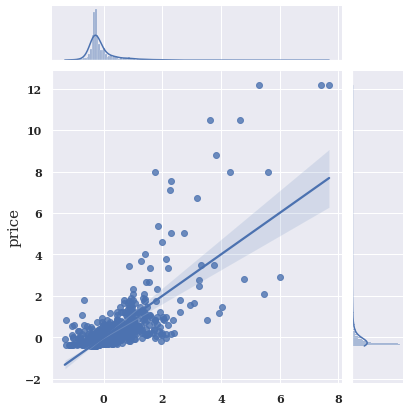

In [1719]:
import seaborn as sns
preds = lr.predict(X_train)

sns.jointplot(x=preds,y=y_train, kind='reg');

In [1720]:
r_squared = lr.score(X_train,y_train)
r_squared

0.5944137614333214

In [1721]:
preds = lr.predict(X_train)
preds

array([-0.30501055, -0.4409991 , -0.2324116 , ...,  0.19398864,
       -0.07596934,  0.58555475])

In [1722]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_train, preds)

0.2583111996871256

In [1723]:
r_squared = lr.score(X_val,y_val)
r_squared

0.5557728595077802

In [1724]:
preds_val = lr.predict(X_val)
mae(y_val, preds_val)

0.3192190778304765

In [1726]:
# checking coefficients and statistical significance on validation set
import statsmodels.api as sm
model = sm.OLS(y_val,X_train)
fii = model.fit()
mask = fii.summary2().tables[1]['P>|t|'] <= .05
sig_table = fii.summary2().tables[1][mask]
sig_table.head(50)

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
rating,0.520578,0.074590,6.979168,1.489263e-11,0.373878,0.667279
age,0.526237,0.259878,2.024939,4.363026e-02,0.015123,1.037350
2005,0.198450,0.043918,4.518673,8.515604e-06,0.112075,0.284825
2009,0.248483,0.046203,5.378079,1.377356e-07,0.157614,0.339353
2010,-0.153206,0.061085,-2.508074,1.258970e-02,-0.273344,-0.033067
2012,0.090997,0.043785,2.078275,3.841022e-02,0.004883,0.177111
2014,-0.166546,0.076695,-2.171523,3.056093e-02,-0.317386,-0.015705
2015,-0.271511,0.097084,-2.796657,5.447856e-03,-0.462450,-0.080571
2016,-0.319841,0.110697,-2.889332,4.100452e-03,-0.537554,-0.102128
2017,-0.261899,0.111626,-2.346221,1.952059e-02,-0.481438,-0.042359


In [1739]:
# checking the same on the unseen test at the end
import statsmodels.api as sm
model = sm.OLS(y_test,X_test)
fii = model.fit()
fii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     7.159
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           1.87e-56
Time:                        10:43:45   Log-Likelihood:                -587.16
No. Observations:                 592   AIC:                             1432.
Df Residuals:                     463   BIC:                             1998.
Df Model:                         128                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
reviews                          0.0545      0.036      1.503      0.133      -0.017       0.126
rating                           0.7848      0.078     10.093      0.000       0.632       0.938
age                             -0.1135      0.245     -0.463      0.644      -0.595       0.368
2005                            -0.0267      0.041     -0.654      0.514      -0.107       0.053
2006                            -0.0201      0.031     -0.654      0.514      -0.081       0.040
2009                             0.0640      0.048      1.337      0.182      -0.030       0.158
2010                             0.2505      0.061      4.119      0.000       0.131       0.370
2011                            -0.0077      0.054     -0.143      0.886      -0.114       0.098
2012                             0.0320      0.053      0.598      0.550      -0.073       0.137
2013                            -0.0159      0.063     -0.254      0.800      -0.139       0.107
2014                             0.0580      0.077      0.749      0.454      -0.094       0.210
2015                            -0.0062      0.098     -0.063      0.949      -0.199       0.187
2016                            -0.0573      0.110     -0.523      0.602      -0.273       0.158
2017                            -0.0750      0.117     -0.639      0.523      -0.305       0.155
2018                            -0.1367      0.117     -1.163      0.245      -0.367       0.094
2019                            -0.0252      0.078     -0.322      0.748      -0.179       0.129
2020                             0.3000      0.165      1.816      0.070      -0.025       0.625
Zinfandel                        0.0265      0.043      0.616      0.538      -0.058       0.111
Maipo Valley                    -0.0008      0.031     -0.025      0.980      -0.062       0.061
Cabernet Sauvignon               0.0474      0.082      0.575      0.566      -0.115       0.209
Central Coast                   -0.0051      0.067     -0.076      0.939      -0.137       0.126
Paso Robles                     -0.0121      0.068     -0.178      0.859      -0.145       0.121
Calatayud                       -0.0013      0.054     -0.023      0.981      -0.108       0.105
Tempranillo                     -0.0008      0.125     -0.006      0.995      -0.246       0.245
Pinot Noir                       0.0377      0.068      0.551      0.582      -0.097       0.172
Bordeaux                         0.0565      0.142      0.399      0.690      -0.222       0.335
Rioja                           -0.0661      0.106     -0.623      0.534      -0.275       0.143
Rhone Blend                     -0.0482      0.089     -0.542      0.588      -0.223       0.127
Rhone                            0.0475      0.094      0.507      0.613    

In [1741]:
mask = abs(fii.summary2().tables[1]['P>|t|']) < .05
test_results = fii.summary2().tables[1][mask]
coefs = pd.DataFrame(test_results['Coef.'])
coefs['abs'] = abs(coefs['Coef.'])
coefs.sort_values('Coef.').head(20)

,Coef.,abs
Napa Valley,0.097477,0.097477
Barossa,0.162605,0.162605
2010,0.250490,0.250490
Pessac-Leognan,0.286516,0.286516
Pauillac,0.312171,0.312171
rating,0.784762,0.784762


In [1742]:
mask = abs(fii.summary2().tables[1]['Coef.']) > 0
test_results = fii.summary2().tables[1][mask]
coefs = pd.DataFrame(test_results['Coef.'])
coefs['abs'] = abs(coefs['Coef.'])
coefs.sort_values('Coef.').head(20)

,Coef.,abs
2018,-0.136663,0.136663
age,-0.113499,0.113499
2017,-0.074958,0.074958
Rioja,-0.066145,0.066145
2016,-0.057318,0.057318
Margaux,-0.053501,0.053501
Saint-Emilion,-0.052506,0.052506
Barolo,-0.051042,0.051042
Saint-Estephe,-0.049970,0.049970
Rhone Blend,-0.048240,0.048240


In [1733]:
list(coefs.index)

['reviews',
 'rating',
 'age',
 '2005',
 '2006',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 'Zinfandel',
 'Maipo Valley',
 'Cabernet Sauvignon',
 'Central Coast',
 'Paso Robles',
 'Calatayud',
 'Tempranillo',
 'Pinot Noir',
 'Bordeaux',
 'Rioja',
 'Rhone Blend',
 'Rhone',
 'Cotes du Rhone',
 'Santa Barbara',
 'Syrah/Shiraz',
 'Napa Valley',
 'Tuscany',
 'Sangiovese',
 'Rosso di Montalcino',
 'Mendoza',
 'Malbec',
 'Vino Nobile di Montepulciano',
 'Colchagua Valley',
 'Carmenere',
 'Red Blend',
 'Sonoma County',
 'Bordeaux/Bordeaux Superieur',
 'Chianti Classico',
 'Mendocino',
 'Douro',
 'Lujan de Cuyo',
 'La Mancha',
 'Aglianico',
 'Toscana',
 'Fronsac/Canon Fronsac',
 'Haut-Medoc',
 'Sonoma Coast',
 'Pauillac',
 'Pessac-Leognan',
 'Languedoc',
 'Piedmont',
 'Nebbiolo',
 'Barolo',
 'Barbera',
 'Willamette Valley',
 'McLaren Vale',
 'Petite Sirah',
 'Pinotage',
 'Brunello di Montalcino',
 'Cotes du Rhone-Villages',
 'Mor

In [1734]:
# reaggregating categorical variables

cat = ['reviews', 'rating', 'age', 'vintage', 'vintage', 'vintage', 'vintage', 'vintage', 'vintage', 'vintage', 'vintage', 'vintage', 'vintage', 'vintage', 'vintage', 'vintage', 'vintage', 'grape', 'region', 'grape', 'region', 'region', 'region', 'grape', 'grape', 'grape', 'region', 'grape', 'region', 'region', 'region', 'grape', 'region', 'region', 'grape', 'region', 'region', 'grape', 'grape', 'region', 'region', 'grape', 'region', 'region', 'region', 'region', 'region', 'region', 'region', 'grape', 'region', 'region', 'region', 'region', 'region', 'region', 'region', 'region', 'grape', 'grape', 'grape', 'region', 'region', 'grape', 'grape', 'region', 'region', 'region', 'region', 'region', 'region', "grape", 'region', 'region', 'region', 'region', 'region', 'grape', 'region', 'region', 'grape', 'region', 'region', 'grape', 'grape', "region", 'region', 'region', "region", 'region', 'region', 'region', 'region', 'region', 'region', 'grape', 'region', 'grape', 'region', 'region', 'region', 'region', 'grape', 'region', 'region', 'grape', 'region', 'region', 'region', 'grape', 'region', 'region', 'region', 'region', 'grape', 'region', 'region', 'region', 'region', "region", 'grape', 'region', 'region', 'region', 'region', 'region', 'region', 'region', 'region', 'region', 'grape', 'region', 'region', 'region', 'region', 'region', 'region', 'region', 'region', 'region', 'region', 'region', 'region', 'region', 'region', 'region', 'region', 'region', 'grape', 'grape', 'region', 'region']

coefs['cat'] = cat
coefs

,Coef.,abs,cat
reviews,0.038540,0.038540,reviews
rating,0.658350,0.658350,rating
age,-0.015943,0.015943,age
2005,0.214702,0.214702,vintage
2006,0.074679,0.074679,vintage
...,...,...,...
Marlborough,-0.002076,0.002076,region
Petit Verdot,-0.003038,0.003038,grape
Negroamaro,-0.001023,0.001023,grape
Beaujolais,-0.017551,0.017551,region


In [1738]:
coefs.sort_values('Coef.').head(20)

,Coef.,abs,cat
2018,-0.155452,0.155452,vintage
2017,-0.098169,0.098169,vintage
2016,-0.089296,0.089296,vintage
2015,-0.081013,0.081013,vintage
2019,-0.080534,0.080534,vintage
Saint-Julien,-0.061193,0.061193,region
Rioja,-0.041221,0.041221,region
Brunello di Montalcino,-0.031841,0.031841,region
Saint-Estephe,-0.028571,0.028571,region
Cotes du Rhone,-0.028522,0.028522,region


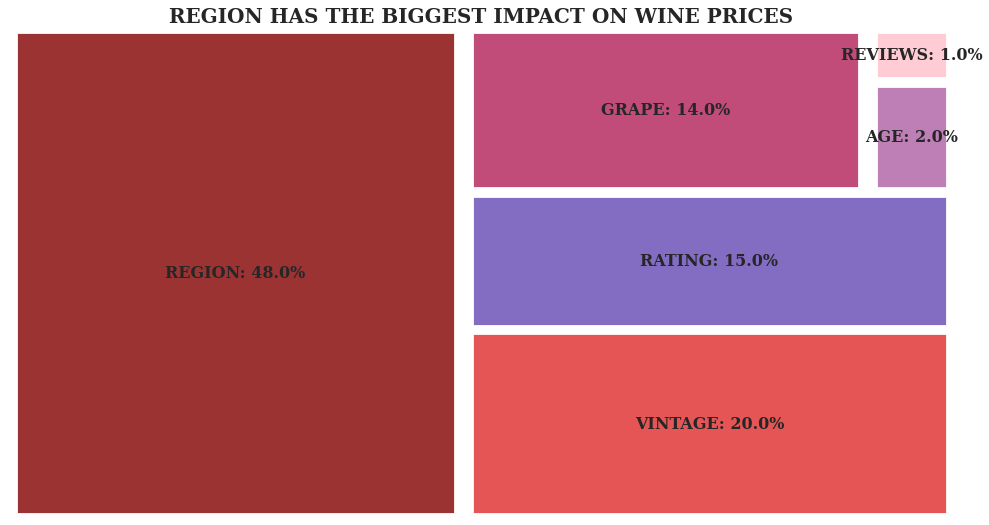

In [1643]:
import matplotlib.pyplot as plt
import squarify    
import pandas as pd

font = {'family': 'serif',
        'weight': 'bold',
        'size': 16}
color = ['#830000','#df2b2b','#6449b4','#b21f57','#ae5fa5','pink']
plt.rc('font', **font)
plt.rc('figure', titlesize=22) 
df = pd.DataFrame({'percentages':sum_df['abs'], 'category':sum_df['cat'] })
squarify.plot(sizes=sum_df['abs'], label=sum_df['label'], alpha=.8, color=color,pad=True )
plt.title('REGION HAS THE BIGGEST IMPACT ON WINE PRICES',fontdict = {'family': 'serif',
        'weight': 'normal','size':20})
plt.axis('off')
plt.show()

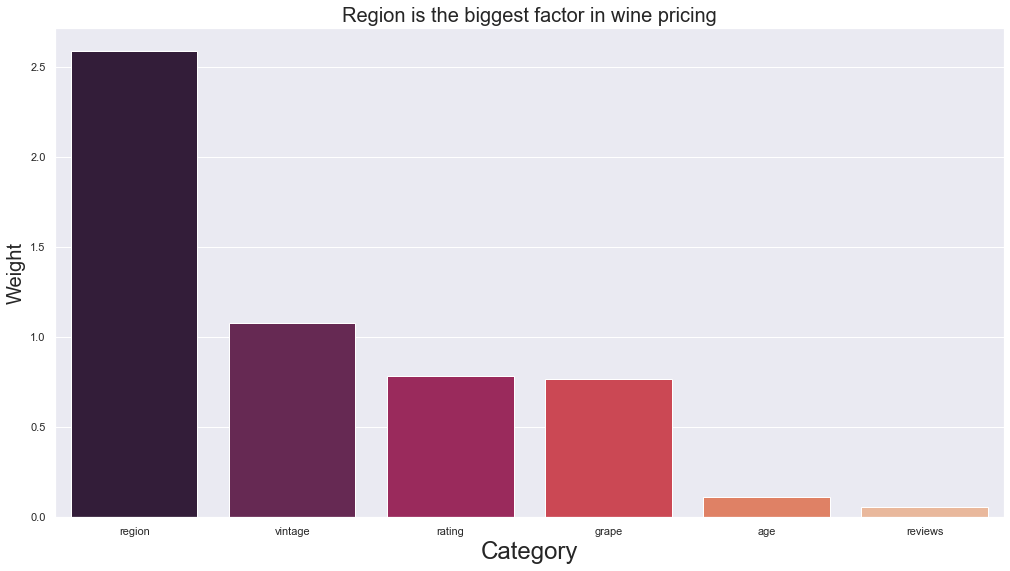

In [1561]:
sns.set(rc={'figure.figsize':(17,9)})
plt.rcParams["axes.labelsize"] = 15
ax = sns.barplot(x="cat", y="abs",palette="rocket",dodge=False,
                 data=sum_df)
ax.set_title('Region is the biggest factor in wine pricing',fontdict= { 'fontsize': 20})
ax.set_ylabel('Weight',fontdict= { 'fontsize': 20})
ax.set_xlabel('Category',fontdict= { 'fontsize': 24})
plt.show()

In [1743]:
# scoring test set with linear regression to evaluate performance
r_squared = lr.score(X_test,y_test)
r_squared

0.5296144097289341

In [1736]:
preds_test = lr.predict(X_test)
mae(y_test, preds_test)

0.31304591440686114

In [1737]:
# trying scaling and Lasso but it didn't improve performance so I abandoned it
from sklearn.preprocessing import StandardScaler

In [1468]:
scale = StandardScaler()
X_scale = scale.fit_transform(X_train)
X_val_scale = scale.fit_transform(X_val)
lr.fit(X_val_scale, y_val)
coefficients = list(zip(X_train.columns,lr.coef_))
coefficients

[('reviews', -6.838440721457018),
 ('rating', 60.240620510062826),
 ('age', 100343972793225.08),
 ('2005', -5329256097176.351),
 ('2006', -1886175689407.316),
 ('2009', 6520046539262.135),
 ('2010', 11281031591486.71),
 ('2011', 10658512194412.7),
 ('2012', -419473056825975.06),
 ('2013', 25198246656873.766),
 ('2014', 41352300890074.17),
 ('2015', 64506853364348.71),
 ('2016', 82691841677975.0),
 ('2017', 127365691318627.56),
 ('2018', 137652719917304.16),
 ('2019', 108148669548893.28),
 ('2020', 262979815413455.3),
 ('Zinfandel', 1.3047481620853567),
 ('Maipo Valley', -5.5610228865169375),
 ('Cabernet Sauvignon', -1.6700610957968411),
 ('Central Coast', 0.22562423804072473),
 ('Paso Robles', 1.289711704117348),
 ('Calatayud', -0.7836674208959025),
 ('Tempranillo', -3.9222085561322757),
 ('Pinot Noir', -0.30843637373974886),
 ('Bordeaux', -5.201945445841835),
 ('Rioja', 1.1685788017812628),
 ('Rhone Blend', -1.7975838222305212),
 ('Rhone', 11.902159926480145),
 ('Cotes du Rhone', -2.2

In [1414]:
from sklearn.linear_model import Lasso
alphas = [0.01,.05,.07,.1]
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_scale,y_train)
    print(f"alpha={alpha}: \t{lasso.score(X_scale,y_train):.4f} \t{lasso.score(X_val_scale,y_val):.4f}")

alpha=0.01: 	0.5944 	0.5089
alpha=0.05: 	0.5943 	0.5093
alpha=0.07: 	0.5942 	0.5091
alpha=0.1: 	0.5940 	0.5089


In [1412]:
# checking for features that don't matter
useless_features = []
for coef in coefficients:
    if abs(coef[1]) < .05:
        useless_features.append(coef[0])
useless_features

[]